In [31]:
import pandas as pd

In [32]:
df=pd.read_csv('hr_data.csv')

In [33]:
df

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low


In [48]:
df.dtypes

employee_id               int64
number_project            int64
average_montly_hours      int64
time_spend_company        int64
Work_accident             int64
left                      int64
promotion_last_5years     int64
department               object
salary                   object
salary_numeric            int64
dtype: object

In [49]:
salary_mapping={'low':1,'medium':2,'high':3}
salary_mapping

{'low': 1, 'medium': 2, 'high': 3}

In [50]:
df['salary_numeric']=df['salary'].map(salary_mapping)

In [51]:
df

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,salary_numeric
0,1003,2,157,3,0,1,0,sales,low,1
1,1005,5,262,6,0,1,0,sales,medium,2
2,1486,7,272,4,0,1,0,sales,medium,2
3,1038,5,223,5,0,1,0,sales,low,1
4,1057,2,159,3,0,1,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,87670,2,151,3,0,1,0,support,low,1
14995,87673,2,160,3,0,1,0,support,low,1
14996,87679,2,143,3,0,1,0,support,low,1
14997,87681,6,280,4,0,1,0,support,low,1


In [52]:
average=df.groupby('department')['salary_numeric'].mean()

In [53]:
average

department
IT             1.571312
RandD          1.602287
accounting     1.629726
hr             1.607578
management     2.071429
marketing      1.624709
product_mng    1.575388
sales          1.557971
support        1.549125
technical      1.569485
Name: salary_numeric, dtype: float64

In [54]:
highest_salary=df.loc[df.groupby('department')['salary_numeric'].idxmax()]

In [55]:
highest_salary

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,salary_numeric
1281,8252,5,270,5,0,1,0,IT,high,3
1827,11283,5,286,4,0,1,0,RandD,high,3
384,3297,2,156,3,0,1,0,accounting,high,3
111,1698,6,289,4,0,1,0,hr,high,3
1203,7804,6,259,4,0,1,0,management,high,3
306,57209,2,149,3,0,1,0,marketing,high,3
72,22316,2,149,3,0,1,0,product_mng,high,3
696,4979,7,291,4,0,1,0,sales,high,3
657,4736,2,130,3,0,1,0,support,high,3
189,2156,2,156,3,0,1,0,technical,high,3


In [56]:
high_salary=df.groupby('department')['salary_numeric'].max()

In [57]:
high_salary

department
IT             3
RandD          3
accounting     3
hr             3
management     3
marketing      3
product_mng    3
sales          3
support        3
technical      3
Name: salary_numeric, dtype: int64

In [58]:
high_salary_min=df.groupby('department')['salary_numeric'].min()
high_salary_min

department
IT             1
RandD          1
accounting     1
hr             1
management     1
marketing      1
product_mng    1
sales          1
support        1
technical      1
Name: salary_numeric, dtype: int64

In [59]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [60]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

# Linear Regression

In [61]:
import pandas as pd
import numpy as np

In [62]:
df=pd.read_csv(r"C:\Users\91805\Downloads\Data science\Data Science Student Share Folder (last)\Data Science Student Share Folder\Data Sets\NewspaperData.csv")
df

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [66]:
#OLS=Ordinary Least Squares
import statsmodels.formula.api as smf
model = smf.ols("sunday~daily",data = df).fit()

In [67]:
model

In [70]:
model.fittedvalues

0      538.939509
1      706.442705
2      490.275710
3      333.431284
4      734.307432
5      996.884826
6      280.213795
7      352.279731
8      290.090172
9      323.546868
10     616.379041
11     400.438457
12     262.668890
13    1573.783417
14     609.447357
15     566.965002
16     378.613164
17    1061.219269
18    1633.852208
19    1119.786239
20     313.594128
21     489.224034
22     704.489401
23     309.195844
24     466.219792
25     277.920203
26     192.337885
27     514.901007
28     380.708478
29     777.960698
30     538.047259
31     284.270451
32     444.722729
33    1137.725020
dtype: float64

In [71]:
model.resid

0     -50.433509
1      91.855295
2    -255.191710
3     -33.980284
4    -175.214432
5     136.364174
6      68.530205
7      65.499269
8      54.431828
9      -0.462868
10      4.372959
11     22.866543
12    -60.054890
13    -42.256417
14    -55.968357
15    119.009998
16    -54.372164
17    -77.979269
18    128.162792
19   -159.478239
20    -28.983128
21    -81.464034
22    278.173599
23    247.804156
24    -25.296792
25     -9.860203
26     69.710115
27    -82.399007
28    -42.353478
29    -73.638698
30     47.633741
31    -16.489451
32    -36.379729
33     27.841980
dtype: float64

In [72]:
model.rsquared

0.9180596895873295

In [73]:
import pandas as pd

data = {
    'Size': [1500, 1800, 2400, 3000, 1200, 2600, 2200, 1400, 2800, 3200, 2000, 1600, 2300, 2700],
    'Bedrooms': [3, 4, 3, 5, 2, 4, 3, 2, 4, 5, 3, 3, 3, 4],
    'Price': [300000, 350000, 400000, 500000, 200000, 420000, 380000, 250000, 450000, 550000, 370000, 310000, 390000, 430000]
}



In [74]:
df = pd.DataFrame(data)
df

,Size,Bedrooms,Price
0,1500,3,300000
1,1800,4,350000
2,2400,3,400000
3,3000,5,500000
4,1200,2,200000
5,2600,4,420000
6,2200,3,380000
7,1400,2,250000
8,2800,4,450000
9,3200,5,550000


In [76]:
x=df[['Size','Bedrooms']]
y=df['Price']

In [77]:
x

,Size,Bedrooms
0,1500,3
1,1800,4
2,2400,3
3,3000,5
4,1200,2
5,2600,4
6,2200,3
7,1400,2
8,2800,4
9,3200,5


In [78]:
y

0     300000
1     350000
2     400000
3     500000
4     200000
5     420000
6     380000
7     250000
8     450000
9     550000
10    370000
11    310000
12    390000
13    430000
Name: Price, dtype: int64

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [80]:
x_train

,Size,Bedrooms
12,2300,3
5,2600,4
8,2800,4
2,2400,3
1,1800,4
13,2700,4
4,1200,2
7,1400,2
10,2000,3
3,3000,5


In [81]:
x_test

,Size,Bedrooms
9,3200,5
11,1600,3
0,1500,3


In [82]:
y_train

12    390000
5     420000
8     450000
2     400000
1     350000
13    430000
4     200000
7     250000
10    370000
3     500000
6     380000
Name: Price, dtype: int64

In [83]:
y_test

9     550000
11    310000
0     300000
Name: Price, dtype: int64

In [84]:
model=LinearRegression()

In [85]:
model.fit(x_train,y_train)

LinearRegression()

In [89]:
y_pred=model.predict(x_test)
y_pred

array([525790.98143236, 294130.50397878, 281873.74005305])

In [87]:
x_test

,Size,Bedrooms
9,3200,5
11,1600,3
0,1500,3


In [94]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [96]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)

In [98]:
mse,mae

(388826261.2134022, 19401.591511936276)

# Probability and Statistics

In [99]:
from scipy import stats

In [100]:
sample_mean=28
pop_mean=30
std_dev=5
n=50

In [101]:
t_stat,p_value = stats.ttest_1samp(a=[sample_mean]*n,popmean=pop_mean)

C:\Users\91805\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:502: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [102]:
t_stat

-inf

In [103]:
p_value

0.0

In [105]:
if p_value < 0.05:
    print("Reject the null hypothesis: The company's claim is valid.")
else:
    print("Fail to reject the null hypothesis: The claim is not valid.")


Reject the null hypothesis: The company's claim is valid.


# Time-Series Analysis

In [106]:
import pandas as pd

# Creating the sales dataset
data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-06',
             '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11', '2024-01-12'],
    'Product': ['Laptop', 'Smartphone', 'Tablet', 'Headphones', 'Smartwatch', 'Camera', 'Monitor',
                'Keyboard', 'Mouse', 'Printer', 'TV', 'Speaker'],
    'Category': ['Electronics', 'Electronics', 'Electronics', 'Accessories', 'Accessories',
                 'Electronics', 'Electronics', 'Accessories', 'Accessories', 'Electronics', 'Electronics', 'Accessories'],
    'Quantity': [5, 10, 7, 15, 8, 4, 6, 12, 20, 3, 2, 10],
    'Price': [800, 600, 300, 50, 200, 500, 250, 40, 30, 150, 1000, 70],
    'Revenue': [4000, 6000, 2100, 750, 1600, 2000, 1500, 480, 600, 450, 2000, 700],
    'Region': ['North', 'South', 'East', 'West', 'North', 'South', 'East', 'West', 'North', 'South', 'East', 'West']
}



In [107]:
df = pd.DataFrame(data)
df

,Date,Product,Category,Quantity,Price,Revenue,Region
0,2024-01-01,Laptop,Electronics,5,800,4000,North
1,2024-01-02,Smartphone,Electronics,10,600,6000,South
2,2024-01-03,Tablet,Electronics,7,300,2100,East
3,2024-01-04,Headphones,Accessories,15,50,750,West
4,2024-01-05,Smartwatch,Accessories,8,200,1600,North
5,2024-01-06,Camera,Electronics,4,500,2000,South
6,2024-01-07,Monitor,Electronics,6,250,1500,East
7,2024-01-08,Keyboard,Accessories,12,40,480,West
8,2024-01-09,Mouse,Accessories,20,30,600,North
9,2024-01-10,Printer,Electronics,3,150,450,South


In [109]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [111]:
df['Date'] = pd.to_datetime(df['Date'])

In [112]:
df

,Date,Product,Category,Quantity,Price,Revenue,Region
0,2024-01-01,Laptop,Electronics,5,800,4000,North
1,2024-01-02,Smartphone,Electronics,10,600,6000,South
2,2024-01-03,Tablet,Electronics,7,300,2100,East
3,2024-01-04,Headphones,Accessories,15,50,750,West
4,2024-01-05,Smartwatch,Accessories,8,200,1600,North
5,2024-01-06,Camera,Electronics,4,500,2000,South
6,2024-01-07,Monitor,Electronics,6,250,1500,East
7,2024-01-08,Keyboard,Accessories,12,40,480,West
8,2024-01-09,Mouse,Accessories,20,30,600,North
9,2024-01-10,Printer,Electronics,3,150,450,South


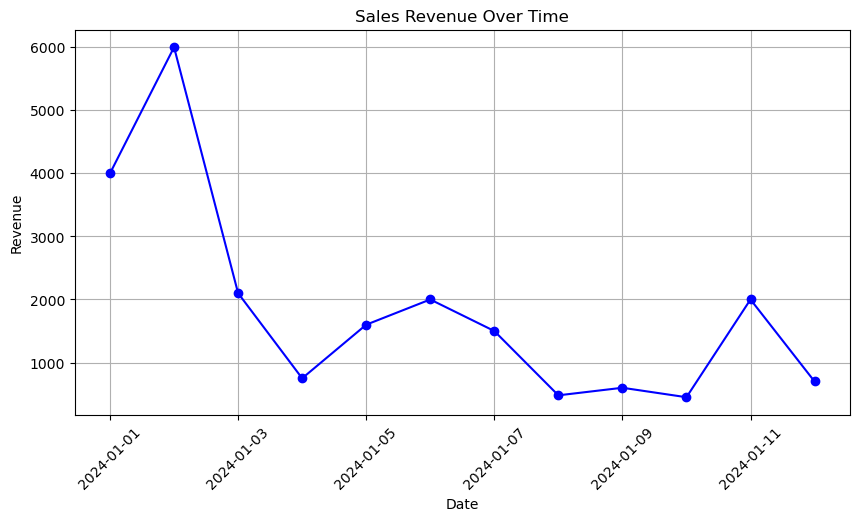

In [114]:
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Revenue'], marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("Sales Revenue Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()

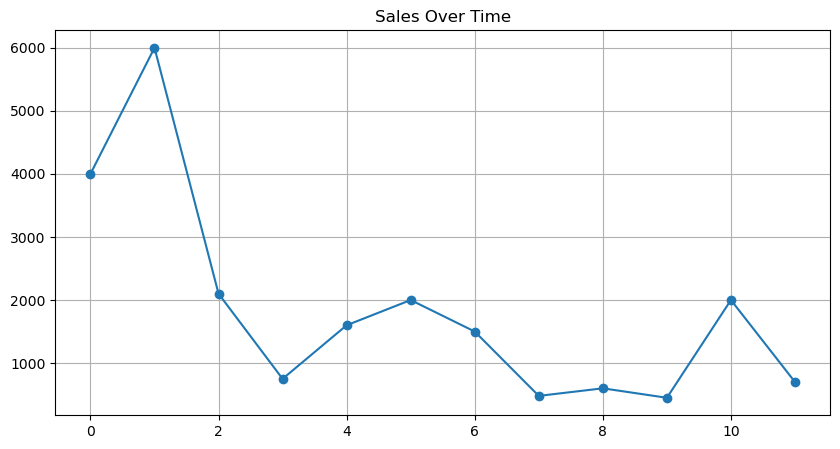

In [118]:
df['Revenue'].plot(figsize=(10,5), title="Sales Over Time",marker='o')
plt.grid()
plt.show()

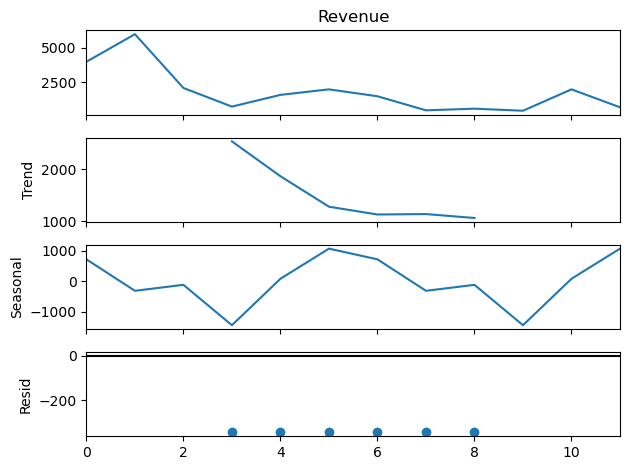

In [122]:
decomposition = seasonal_decompose(df['Revenue'], model='additive', period=6)
decomposition.plot()
plt.show()


## 15-03-2025

In [4]:
# Find Missing Number in an Array
def missing_number(arr,n):
    result=[]
    for i in range(1,n):
        if i not in arr:
            result.append(i)
    return result
missing_number([1, 2, 4, 5, 6],6)
    

[3]

In [7]:
def missing_number(arr):
    result = []
    for i in range(1, max(arr) + 1):
        if i not in arr:
            result.append(i)
    return result

print(missing_number([1, 2, 4, 5, 6]))  


[3]


In [8]:
# Detect Duplicates in a Dataset
import pandas as pd
data = {'ID': [1, 2, 3, 4, 5, 3],
        'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Charlie']}
df = pd.DataFrame(data)
df

,ID,Name
0,1,Alice
1,2,Bob
2,3,Charlie
3,4,David
4,5,Eve
5,3,Charlie


In [11]:
dupli=df[df.duplicated()]

In [12]:
dupli

,ID,Name
5,3,Charlie


In [13]:
df[df.duplicated()]

,ID,Name
5,3,Charlie


In [16]:
# Find the Most Frequent Word in a Text File
from collections import Counter
def most_frequent_word(text):
    word=text.split()
    word_count=Counter(word)
    return word_count.most_common(1)[0]
most_frequent_word( )

('data', 2)

In [23]:
def most_frequent(s):
    word=s.split()
    result={}
    for i in word:
        if i not in result:
            result[i]=1
        else:
            result[i]+=1
    return result
most_frequent("data science is amazing and data science is fun")
    

{'data': 2, 'science': 2, 'is': 2, 'amazing': 1, 'and': 1, 'fun': 1}

In [24]:
# Predict House Prices Using Linear Regression

import pandas as pd

data = {'Size': [1000, 1200, 1500, 1800, 2000],
        'Price': [200000, 250000, 300000, 350000, 400000]}
df = pd.DataFrame(data)
df

,Size,Price
0,1000,200000
1,1200,250000
2,1500,300000
3,1800,350000
4,2000,400000


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [26]:
x=df[['Size']]
y=df['Price']

In [27]:
x

,Size
0,1000
1,1200
2,1500
3,1800
4,2000


In [28]:
y

0    200000
1    250000
2    300000
3    350000
4    400000
Name: Price, dtype: int64

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [42]:
x_train

,Size
4,2000
2,1500
0,1000
3,1800


In [43]:
x_test

,Size
1,1200


In [44]:
y_train

4    400000
2    300000
0    200000
3    350000
Name: Price, dtype: int64

In [45]:
y_test

1    250000
Name: Price, dtype: int64

In [46]:
model=LinearRegression()

In [47]:
model.fit(x_train,y_train)

LinearRegression()

In [48]:
model.predict([[1600]])

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([317400.88105727])

In [49]:
model.predict(x_test)

array([238986.78414097])

In [53]:
# Count the Number of Null Values in a DataFrame

data = {'Name': ['Alice', 'Bob', None, 'David'],
        'Age': [25, None, 30, 40]}
df = pd.DataFrame(data)
df

,Name,Age
0,Alice,25.0
1,Bob,NaN
2,None,30.0
3,David,40.0


In [54]:
df.isnull().sum()

Name    1
Age     1
dtype: int64

In [55]:
# Time Series Forecasting Using ARIMA

import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

In [56]:
data = {'Date': pd.date_range(start='1/1/2023', periods=10, freq='M'),
        'Sales': [200, 220, 240, 260, 280, 300, 320, 340, 360, 380]}
df=pd.DataFrame(data)
df

,Date,Sales
0,2023-01-31,200
1,2023-02-28,220
2,2023-03-31,240
3,2023-04-30,260
4,2023-05-31,280
5,2023-06-30,300
6,2023-07-31,320
7,2023-08-31,340
8,2023-09-30,360
9,2023-10-31,380


In [62]:
df.set_index('Date',inplace=True)

In [63]:
df

,Sales
Date,
2023-01-31,200
2023-02-28,220
2023-03-31,240
2023-04-30,260
2023-05-31,280
2023-06-30,300
2023-07-31,320
2023-08-31,340
2023-09-30,360


In [64]:
model=ARIMA(df['Sales'],order=(1,1,1))

C:\Users\91805\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\91805\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\91805\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [67]:
model_fit=model.fit()

C:\Users\91805\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\91805\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [68]:
model_fit.forecast(steps=3)

2023-11-30    399.999947
2023-12-31    419.999787
2024-01-31    439.999521
Freq: M, Name: predicted_mean, dtype: float64

In [69]:
df

,Sales
Date,
2023-01-31,200
2023-02-28,220
2023-03-31,240
2023-04-30,260
2023-05-31,280
2023-06-30,300
2023-07-31,320
2023-08-31,340
2023-09-30,360


In [70]:
# Predict House Prices Using Linear Regression

import pandas as pd

data = {'Size': [1000, 1200, 1500, 1800, 2000],
        'Price': [200000, 250000, 300000, 350000, 400000]}
df = pd.DataFrame(data)
df

,Size,Price
0,1000,200000
1,1200,250000
2,1500,300000
3,1800,350000
4,2000,400000


In [71]:
df.set_index('Size',inplace=True)

In [72]:
df

,Price
Size,
1000,200000
1200,250000
1500,300000
1800,350000
2000,400000


In [76]:
model = ARIMA(df['Price'], order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=6)

C:\Users\91805\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91805\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91805\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\91805\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\91805\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed t

In [77]:
forecast

5     449967.705312
6     499872.298143
7     549713.858209
8     599492.465124
9     649208.198402
10    698861.137456
Name: predicted_mean, dtype: float64

In [78]:
# K-Means Clustering on Customer Data

import pandas as pd

data = {'Annual_Income': [15, 16, 17, 80, 81, 82],
        'Spending_Score': [39, 81, 6, 77, 40, 66]}
df = pd.DataFrame(data)
df

,Annual_Income,Spending_Score
0,15,39
1,16,81
2,17,6
3,80,77
4,81,40
5,82,66


In [79]:
from sklearn.cluster import KMeans

In [97]:
kmeans=KMeans(n_clusters=2,random_state=42)

In [98]:
kmeans

KMeans(n_clusters=2, random_state=42)

In [99]:
df['cluster']=kmeans.fit_predict(df[['Annual_Income','Spending_Score']])

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [100]:
df

,Annual_Income,Spending_Score,cluster
0,15,39,0
1,16,81,1
2,17,6,0
3,80,77,1
4,81,40,1
5,82,66,1


In [101]:
kmeans.fit_predict(df[['Annual_Income','Spending_Score']])

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 1, 0, 1, 1, 1])

In [104]:
# Reverse a String Without Using Built-in Functions

def reverse_string(s):
    s2=''
    for i in s:
        s2=i+s2
    return s2
reverse_string("DataScience")

'ecneicSataD'

In [106]:
# Find the Second Largest Number in an Array

def second_large(arr):
    large=arr[0]
    s_large=float('-inf')
    for i in arr:
        if i>large:
            s_large=large
            large=i
        elif i>s_large or i<large:
            s_large=i
    return s_large,large
second_large([10, 20, 4, 45, 99])

(45, 99)

In [113]:
from collections import Counter 
def most_frequent_word(word):
    word_count=Counter(word)
    return word_count.most_common(1)[0]
most_frequent_word(["apple", "banana", "apple", "orange", "banana", "apple"])

('apple', 3)

In [114]:
def median(arr):
    result=0
    for i in arr:
        result+=i
    return result//len(arr)
median([1, 2, 3, 4, 5])

3

# # # Predict House Prices Using Decision Trees

In [115]:
import pandas as pd

data = {'Size': [1000, 1200, 1500, 1800, 2000],
        'Bedrooms': [2, 3, 3, 4, 4],
        'Price': [200000, 250000, 300000, 350000, 400000]}
df = pd.DataFrame(data)
df

,Size,Bedrooms,Price
0,1000,2,200000
1,1200,3,250000
2,1500,3,300000
3,1800,4,350000
4,2000,4,400000


In [118]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [122]:
x=df[['Size','Bedrooms']]
y=df['Price']

In [124]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [125]:
x_train

,Size,Bedrooms
4,2000,4
2,1500,3
0,1000,2
3,1800,4


In [126]:
x_test

,Size,Bedrooms
1,1200,3


In [127]:
y_train

4    400000
2    300000
0    200000
3    350000
Name: Price, dtype: int64

In [128]:
y_test

1    250000
Name: Price, dtype: int64

In [129]:
model=DecisionTreeRegressor()

In [130]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [131]:
model.predict(x_test)

array([200000.])

In [132]:
y_test

1    250000
Name: Price, dtype: int64

In [133]:
model.predict([[1600, 3]])

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([300000.])

# 16-03-2025

In [1]:
# Find the Correlation Between Features in a Dataset

import pandas as pd

data = {'Age': [25, 32, 47, 51, 62],
        'Income': [40000, 60000, 80000, 90000, 120000]}
df = pd.DataFrame(data)
df

,Age,Income
0,25,40000
1,32,60000
2,47,80000
3,51,90000
4,62,120000


In [2]:
df.corr()

,Age,Income
Age,1.00000,0.98844
Income,0.98844,1.00000


In [3]:
# Find the Outliers in a Dataset Using IQR

import pandas as pd
import numpy as np

In [5]:
data = {'Salary': [30000, 40000, 50000, 70000, 80000, 200000]}
df = pd.DataFrame(data)
df

,Salary
0,30000
1,40000
2,50000
3,70000
4,80000
5,200000


In [6]:
Q1=df['Salary'].quantile(0.25)
Q1

42500.0

In [7]:
Q3=df['Salary'].quantile(0.75)
Q3

77500.0

In [10]:
IQR=Q3-Q1
IQR

35000.0

In [15]:
outliers=df[(df['Salary']<(Q1-1.5*IQR)) | (df['Salary']>(Q3+1.5*IQR))]
outliers

,Salary
5,200000


In [16]:
# Implement K-Nearest Neighbors (KNN) Classifier

import pandas as pd
import numpy as np

In [17]:
data = {'Feature1': [1, 2, 3, 6, 7, 8],
        'Feature2': [10, 11, 12, 20, 21, 22],
        'Label': [0, 0, 0, 1, 1, 1]}
df = pd.DataFrame(data)
df

,Feature1,Feature2,Label
0,1,10,0
1,2,11,0
2,3,12,0
3,6,20,1
4,7,21,1
5,8,22,1


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x=df[['Feature1','Feature2']]
y=df['Label']

In [20]:
x

,Feature1,Feature2
0,1,10
1,2,11
2,3,12
3,6,20
4,7,21
5,8,22


In [21]:
y

0    0
1    0
2    0
3    1
4    1
5    1
Name: Label, dtype: int64

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
x_train

,Feature1,Feature2
5,8,22
2,3,12
4,7,21
3,6,20


In [24]:
x_test

,Feature1,Feature2
0,1,10
1,2,11


In [25]:
y_train

5    1
2    0
4    1
3    1
Name: Label, dtype: int64

In [26]:
y_test

0    0
1    0
Name: Label, dtype: int64

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
model=KNeighborsClassifier(n_neighbors=2)

In [33]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [34]:
model.predict(x_test)

array([0, 0], dtype=int64)

In [35]:
y_test

0    0
1    0
Name: Label, dtype: int64

In [37]:
model.predict([[5,15]])

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [39]:
# Find the Top 3 Selling Products in a Dataset

import pandas as pd
import numpy as np

In [40]:
data = {'Product': ['Laptop', 'Phone', 'Tablet', 'Headphones', 'Monitor'],
        'Revenue': [5000, 3000, 4000, 1000, 2000]}
df = pd.DataFrame(data)
df

,Product,Revenue
0,Laptop,5000
1,Phone,3000
2,Tablet,4000
3,Headphones,1000
4,Monitor,2000


In [41]:
top_3 = df.nlargest(3, 'Revenue')
top_3

,Product,Revenue
0,Laptop,5000
2,Tablet,4000
1,Phone,3000


In [47]:
# Remove Duplicates From a List Without Using Set
def remove_dupli(arr):
    result=[]
    for i in arr:
        if i not in result:
            result.append(i)
    return result
remove_dupli([1, 2, 2, 3, 4, 4, 5])

# 1 not in [] =[1,2,3,4,5]

[1, 2, 3, 4, 5]

In [48]:
# Find Missing Number in a List
def missing_number(arr):
    result=[]
    for i in range(1,max(arr)+1):
        if i not in arr:
            result.append(i)
    return result
missing_number([1, 2, 4, 5, 6])

[3]

In [49]:
# Standardize a Column in Pandas

import pandas as pd

In [50]:
data = {'Score': [50, 60, 70, 80, 90]}
df = pd.DataFrame(data)
df

,Score
0,50
1,60
2,70
3,80
4,90


In [51]:
df['standardize']=(df['Score']-df['Score'].mean())/df['Score'].std()

In [52]:
df

,Score,standardize
0,50,-1.264911
1,60,-0.632456
2,70,0.000000
3,80,0.632456
4,90,1.264911


In [53]:
# Flatten Nested list

def flatten_list(arr):
    result=[]
    for i in arr:
        result+=i
    return result
flatten_list([[1, 2], [3, 4], [5]])

[1, 2, 3, 4, 5]

In [57]:
# Calculate RMSE Between Two Lists

import numpy as np


actual = [3, -0.5, 2, 7]
predicted = [2.5, 0.0, 2, 8]

def rmse(actual, predicted):
    errors = np.subtract(actual, predicted)
    squared_errors = np.square(errors)
    mean_squared_error = np.mean(squared_errors)
    return np.sqrt(mean_squared_error)

print(rmse(actual, predicted))


0.6123724356957945


In [61]:
def count_words(s):
    result=s.split()
    print(result)
    return len(result)
count_words( "Data Science is fun")

['Data', 'Science', 'is', 'fun']


4

In [62]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'A': [1, np.nan, 3], 'B': [np.nan, 5, 6]})
df

,A,B
0,1.0,NaN
1,NaN,5.0
2,3.0,6.0


In [63]:
df.isnull().sum()

A    1
B    1
dtype: int64

In [70]:
# K-Means Clustering Implementation

import numpy as np 
import pandas as pd

x = np.random.rand(10, 2)
x

array([[0.95391787, 0.56564288],
       [0.81031151, 0.88369803],
       [0.87329413, 0.03152506],
       [0.87671195, 0.11379023],
       [0.73830577, 0.22138733],
       [0.06654364, 0.53147356],
       [0.69167497, 0.39467393],
       [0.93474763, 0.331537  ],
       [0.81940408, 0.20294673],
       [0.05239442, 0.7356879 ]])

In [71]:
from sklearn.cluster import KMeans

In [83]:
model=KMeans(n_clusters=4,random_state=0)

In [84]:
model.fit(x)

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [85]:
model.cluster_centers_

array([[0.05946903, 0.63358073],
       [0.82279642, 0.48015841],
       [0.84849271, 0.18023727],
       [0.81031151, 0.88369803]])

In [86]:
model.labels_

array([1, 3, 2, 2, 2, 0, 1, 2, 2, 0])

# 17-03-2025

In [1]:
import pandas as pd
df = pd.DataFrame({'City': ['Delhi', 'Mumbai', 'Chennai', 'Delhi']})
df

,City
0,Delhi
1,Mumbai
2,Chennai
3,Delhi


In [3]:
df=pd.get_dummies(df,columns=['City'])

In [4]:
df

,City_Chennai,City_Delhi,City_Mumbai
0,False,True,False
1,False,False,True
2,True,False,False
3,False,True,False


In [5]:
# 2
df = pd.DataFrame({'A': [1, 2, 3, 4], 'B': [4, 3, 2, 1]})
df

,A,B
0,1,4
1,2,3
2,3,2
3,4,1


In [6]:
df['corr']=df['A'].corr(df['B'])

In [7]:
df

,A,B,corr
0,1,4,-1.0
1,2,3,-1.0
2,3,2,-1.0
3,4,1,-1.0


In [12]:
# Write a Function to Check If a String is a Palindrome

def pallindrome(s):
    return s==s[::-1]
print(pallindrome('data'))
print(pallindrome('level'))

False
True


In [13]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'A': [1, np.nan, 3, 4, np.nan]})
df

,A
0,1.0
1,NaN
2,3.0
3,4.0
4,NaN


In [18]:
df['A'].fillna(df['A'].median(),inplace=True)

In [19]:
df

,A
0,1.0
1,3.0
2,3.0
3,4.0
4,3.0


In [20]:
#  Normalize a Numpy Array Between 0 and 1
import numpy as np
arr = np.array([5, 10, 15, 20])
arr

array([ 5, 10, 15, 20])

In [21]:
normalize=(arr-arr.min())/(arr.max()-arr.min())

In [22]:
normalize

array([0.        , 0.33333333, 0.66666667, 1.        ])

In [23]:
#  Create a Confusion Matrix

y_true = [0, 1, 0, 1, 1]
y_pred = [0, 0, 0, 1, 1]

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
model=confusion_matrix(y_true,y_pred)

In [26]:
model

array([[2, 0],
       [1, 2]], dtype=int64)

In [33]:
# Calculate Entropy of a Dataset

import numpy as np
def entropy(probs):
    probs=np.array(probs)
    probs=probs[probs > 0]
    return -np.sum(probs*np.log2(probs))
entropy([0.8,0.2])

0.7219280948873623

In [35]:
#  Calculate RMSE Using Numpy
import numpy as np
def RMSE(y_true,y_pred):
    error=np.subtract(y_true,y_pred)
    squared_error=np.square(error)
    mean_squared_error=np.mean(squared_error)
    return np.sqrt(mean_squared_error)
RMSE([3, -0.5, 2, 7],[2.5, 0.0, 2, 8])

0.6123724356957945

In [36]:
import numpy as np

y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])
rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
print("RMSE:", rmse)


RMSE: 0.6123724356957945


In [39]:
import pandas as pd
df = pd.DataFrame({'Date': ['2024-01-01', '2024-02-15']})
df

,Date
0,2024-01-01
1,2024-02-15


In [40]:
df['Date']=pd.to_datetime(df['Date'])
df

,Date
0,2024-01-01
1,2024-02-15


In [41]:
df['Month'] = df['Date'].dt.month

In [42]:
df

,Date,Month
0,2024-01-01,1
1,2024-02-15,2


In [44]:
#  Create a Pipeline with Scaling + Linear Regression
import pandas as pd
import numpy as np
data = {
    'Experience': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Test_Score': [50, 55, 54, 60, 62, 65, 70, 72, 75, 80],
    'Salary': [40000, 45000, 50000, 52000, 55000, 60000, 65000, 70000, 75000, 80000]
}
df=pd.DataFrame(data)
df

,Experience,Test_Score,Salary
0,1,50,40000
1,2,55,45000
2,3,54,50000
3,4,60,52000
4,5,62,55000
5,6,65,60000
6,7,70,65000
7,8,72,70000
8,9,75,75000
9,10,80,80000


In [45]:
from sklearn.model_selection import train_test_split

In [48]:
x=df[['Experience','Test_Score']]
y=df['Salary']

In [49]:
x

,Experience,Test_Score
0,1,50
1,2,55
2,3,54
3,4,60
4,5,62
5,6,65
6,7,70
7,8,72
8,9,75
9,10,80


In [50]:
y

0    40000
1    45000
2    50000
3    52000
4    55000
5    60000
6    65000
7    70000
8    75000
9    80000
Name: Salary, dtype: int64

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [52]:
x_train

,Experience,Test_Score
5,6,65
0,1,50
7,8,72
2,3,54
9,10,80
4,5,62
3,4,60
6,7,70


In [53]:
x_test

,Experience,Test_Score
8,9,75
1,2,55


In [54]:
y_train

5    60000
0    40000
7    70000
2    50000
9    80000
4    55000
3    52000
6    65000
Name: Salary, dtype: int64

In [55]:
y_test

8    75000
1    45000
Name: Salary, dtype: int64

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [59]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

pipeline.fit(x_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [60]:
pipeline.predict(x_test)

array([74311.21833534, 43503.01568154])

In [61]:
# 
import seaborn as sns
import pandas as pd

df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]})
df

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


<Axes: >

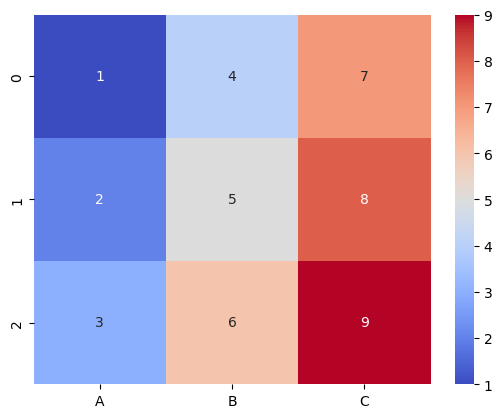

In [64]:
sns.heatmap(data=df,cmap='coolwarm',annot=True)

In [67]:
#  Convert Text Column to Lowercase and Remove Whitespace
data = {
    'text': [
        '   Hello World!   ',
        'Python is GREAT  ',
        '  Machine Learning is fun ',
        '   DATA science   ',
        '   CLEAN Text   '
    ]
}

df = pd.DataFrame(data)
df

,text
0,Hello World!
1,Python is GREAT
2,Machine Learning is fun
3,DATA science
4,CLEAN Text


In [68]:
df['lower']=df['text'].str.lower()

In [69]:
df

,text,lower
0,Hello World!,hello world!
1,Python is GREAT,python is great
2,Machine Learning is fun,machine learning is fun
3,DATA science,data science
4,CLEAN Text,clean text


In [70]:
df['cleaned_text']=df['lower'].str.strip()

In [71]:
df

,text,lower,cleaned_text
0,Hello World!,hello world!,hello world!
1,Python is GREAT,python is great,python is great
2,Machine Learning is fun,machine learning is fun,machine learning is fun
3,DATA science,data science,data science
4,CLEAN Text,clean text,clean text


# 18-03-2025

In [24]:
import pandas as pd
data = {
    'Name': ['John', 'Alice', 'Bob'],
    'Gender': ['Male', 'Female', 'Male'],
    'Region': ['East', 'West', 'North'],
    'Sales': [100, 200, 150]
}

df = pd.DataFrame(data)
df

,Name,Gender,Region,Sales
0,John,Male,East,100
1,Alice,Female,West,200
2,Bob,Male,North,150


In [25]:
df=pd.get_dummies(df,columns=['Gender','Region'])

In [26]:
df

,Name,Sales,Gender_Female,Gender_Male,Region_East,Region_North,Region_West
0,John,100,False,True,True,False,False
1,Alice,200,True,False,False,False,True
2,Bob,150,False,True,False,True,False


In [117]:
# find Random Forest Feature importance

import pandas as pd
data = {
    'Age': [25, 30, 45, 35, 23, 52, 40, 60],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female'],
    'Region': ['East', 'West', 'North', 'South', 'East', 'West', 'North', 'South'],
    'Income': [50000, 60000, 80000, 75000, 52000, 90000, 85000, 62000],
    'Purchased': [0, 1, 1, 0, 0, 1, 1, 0]  # Target variable (binary classification)
}

df = pd.DataFrame(data)

In [118]:
df

,Age,Gender,Region,Income,Purchased
0,25,Male,East,50000,0
1,30,Female,West,60000,1
2,45,Female,North,80000,1
3,35,Male,South,75000,0
4,23,Female,East,52000,0
5,52,Male,West,90000,1
6,40,Male,North,85000,1
7,60,Female,South,62000,0


In [119]:
df = pd.get_dummies(df, columns=['Gender', 'Region'], drop_first=True)

In [120]:
x = df.drop('Purchased', axis=1)
y = df['Purchased']

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [125]:
model = RandomForestClassifier(n_estimators=100,random_state=None)
model.fit(x_train, y_train)

RandomForestClassifier()

In [126]:
model.feature_importances_

array([0.1726801 , 0.38791209, 0.01967338, 0.32124542, 0.09848901,
       0.        ])

In [128]:
# find Random Forest Feature importance

import pandas as pd
data = {
    'Age': [25, 30, 45, 35, 23, 52, 40, 60],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female'],
    'Region': ['East', 'West', 'North', 'South', 'East', 'West', 'North', 'South'],
    'Income': [50000, 60000, 80000, 75000, 52000, 90000, 85000, 62000],
    'Purchased': [0, 1, 1, 0, 0, 1, 1, 0]  # Target variable (binary classification)
}

df = pd.DataFrame(data)

In [129]:
pd.crosstab(df['Gender'], df['Purchased'])


Purchased,0,1
Gender,,
Female,2,2
Male,2,2


In [131]:
#Detect Outliers Using IQR Method
import pandas as pd

data = {'Salary': [30000, 40000, 50000, 70000, 80000, 200000]}
df = pd.DataFrame(data)
df

,Salary
0,30000
1,40000
2,50000
3,70000
4,80000
5,200000


In [132]:
Q1=df['Salary'].quantile(0.25)

In [133]:
Q3=df['Salary'].quantile(0.75)

In [134]:
IQR=Q3-Q1

In [135]:
IQR

35000.0

In [136]:
outliers=(df['Salary']<Q1-1.5*IQR ) | (df['Salary']>Q3+1.5*IQR)

In [137]:
outliers

0    False
1    False
2    False
3    False
4    False
5     True
Name: Salary, dtype: bool

###  Predict customer churn

In [152]:
import pandas as pd

data = {
    'CustomerID': [1, 2, 3, 4, 5],
    'MonthlyCharges': [70, 89, 55, 120, 65],
    'Tenure': [12, 24, 5, 36, 8],
    'Contract': ['Month-to-month', 'One year', 'Month-to-month', 'Two year', 'Month-to-month'],
    'Churn': ['Yes', 'No', 'Yes', 'No', 'Yes']
}

df = pd.DataFrame(data)
df

,CustomerID,MonthlyCharges,Tenure,Contract,Churn
0,1,70,12,Month-to-month,Yes
1,2,89,24,One year,No
2,3,55,5,Month-to-month,Yes
3,4,120,36,Two year,No
4,5,65,8,Month-to-month,Yes


In [153]:
from sklearn.model_selection import train_test_split

In [154]:
x=df[['CustomerID','MonthlyCharges','Tenure','Contract']]

In [155]:
y=df['Churn'].map({'Yes': 1, 'No': 0})

In [158]:
x = pd.get_dummies(x, columns=['Contract'], drop_first=True)

In [159]:
x

,CustomerID,MonthlyCharges,Tenure,Contract_One year,Contract_Two year
0,1,70,12,False,False
1,2,89,24,True,False
2,3,55,5,False,False
3,4,120,36,False,True
4,5,65,8,False,False


In [160]:
y

0    1
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [161]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [162]:
x_train

,CustomerID,MonthlyCharges,Tenure,Contract_One year,Contract_Two year
4,5,65,8,False,False
2,3,55,5,False,False
0,1,70,12,False,False
3,4,120,36,False,True


In [163]:
x_test

,CustomerID,MonthlyCharges,Tenure,Contract_One year,Contract_Two year
1,2,89,24,True,False


In [164]:
y_train

4    1
2    1
0    1
3    0
Name: Churn, dtype: int64

In [165]:
y_test

1    0
Name: Churn, dtype: int64

In [166]:
from sklearn.linear_model import LogisticRegression

In [167]:
model=LogisticRegression()

In [168]:
model.fit(x_train,y_train)

LogisticRegression()

In [171]:
y_pred=model.predict(x_test)

In [170]:
from sklearn.metrics import accuracy_score

In [173]:
accuracy=accuracy_score(y_test,y_pred)

In [174]:
accuracy

0.0

###  House Price Prediction

In [176]:
import pandas as pd
data = {
    'Size': [1500, 1800, 2400, 3000, 3500],
    'Bedrooms': [3, 4, 3, 5, 4],
    'Age': [10, 15, 5, 20, 8],
    'Price': [400000, 500000, 600000, 650000, 700000]
}
df = pd.DataFrame(data)
df

,Size,Bedrooms,Age,Price
0,1500,3,10,400000
1,1800,4,15,500000
2,2400,3,5,600000
3,3000,5,20,650000
4,3500,4,8,700000


In [177]:
from sklearn.model_selection import train_test_split

In [178]:
x=df[['Size','Bedrooms','Age']]

In [179]:
y=df['Price']

In [180]:
x

,Size,Bedrooms,Age
0,1500,3,10
1,1800,4,15
2,2400,3,5
3,3000,5,20
4,3500,4,8


In [181]:
y

0    400000
1    500000
2    600000
3    650000
4    700000
Name: Price, dtype: int64

In [182]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [183]:
x_train

,Size,Bedrooms,Age
4,3500,4,8
2,2400,3,5
0,1500,3,10
3,3000,5,20


In [184]:
x_test

,Size,Bedrooms,Age
1,1800,4,15


In [185]:
y_train

4    700000
2    600000
0    400000
3    650000
Name: Price, dtype: int64

In [186]:
y_test

1    500000
Name: Price, dtype: int64

In [188]:
from sklearn.linear_model import LinearRegression

In [189]:
model=LinearRegression()

In [190]:
model.fit(x_train,y_train)

LinearRegression()

In [191]:
model.predict(x_test)

array([-4200000.00000001])

In [193]:
from sklearn.metrics import mean_squared_error, r2_score

In [195]:
print('MSE :',mean_squared_error(y_test,y_pred))

MSE : 22090000000000.14


In [196]:
print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: nan


C:\Users\91805\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


### Sales Forecasting

In [197]:
data = {
    'Date': pd.date_range(start='2024-01-01', periods=10, freq='D'),
    'Sales': [200, 220, 210, 240, 250, 260, 300, 310, 320, 330]
}
df = pd.DataFrame(data)
df

,Date,Sales
0,2024-01-01,200
1,2024-01-02,220
2,2024-01-03,210
3,2024-01-04,240
4,2024-01-05,250
5,2024-01-06,260
6,2024-01-07,300
7,2024-01-08,310
8,2024-01-09,320
9,2024-01-10,330


In [198]:
from statsmodels.tsa.arima.model import ARIMA

In [199]:
df.set_index('Date',inplace=True)

In [200]:
df

,Sales
Date,
2024-01-01,200
2024-01-02,220
2024-01-03,210
2024-01-04,240
2024-01-05,250
2024-01-06,260
2024-01-07,300
2024-01-08,310
2024-01-09,320


In [201]:
model=ARIMA(df['Sales'],order=(1,1,1))

C:\Users\91805\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\91805\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\91805\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [202]:
model_fit=model.fit()

C:\Users\91805\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\91805\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\91805\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [203]:
forcast=model_fit.forecast(steps=3)

In [204]:
forcast

2024-01-11    342.882926
2024-01-12    355.765699
2024-01-13    368.648319
Freq: D, Name: predicted_mean, dtype: float64

### Credit Card Fraud Detection

In [221]:
data = {
    'TransactionID': [1, 2, 3, 4, 5],
    'Amount': [200, 5000, 150, 7000, 80],
    'Location': ['NY', 'CA', 'TX', 'CA', 'NY'],
    'Fraud': [0, 1, 0, 1, 0]
}
df = pd.DataFrame(data)
df

,TransactionID,Amount,Location,Fraud
0,1,200,NY,0
1,2,5000,CA,1
2,3,150,TX,0
3,4,7000,CA,1
4,5,80,NY,0


In [222]:
from sklearn.model_selection import train_test_split

In [223]:
df.drop('TransactionID',axis=1,inplace=True)

In [224]:
df

,Amount,Location,Fraud
0,200,NY,0
1,5000,CA,1
2,150,TX,0
3,7000,CA,1
4,80,NY,0


In [225]:
x=df[['Amount','Location']]

In [226]:
y=df['Fraud']

In [227]:
encoder = OneHotEncoder(drop='first') 
x_encoded = pd.DataFrame(encoder.fit_transform(x[['Location']]).toarray(),columns=encoder.get_feature_names_out(['Location']))

In [229]:
x_final = pd.concat([x[['Amount']].reset_index(drop=True), x_encoded], axis=1)

In [230]:
x_train,x_test,y_train,y_test=train_test_split(x_final,y,test_size=0.2,random_state=42)

In [231]:
x_train

,Amount,Location_NY,Location_TX
4,80,1.0,0.0
2,150,0.0,1.0
0,200,1.0,0.0
3,7000,0.0,0.0


In [232]:
x_test

,Amount,Location_NY,Location_TX
1,5000,0.0,0.0


In [233]:
y_train

4    0
2    0
0    0
3    1
Name: Fraud, dtype: int64

In [234]:
y_test

1    1
Name: Fraud, dtype: int64

In [235]:
from sklearn.linear_model import LogisticRegression

In [236]:
model=LogisticRegression()

In [237]:
model.fit(x_train,y_train)

LogisticRegression()

In [238]:
x_encoded

,Location_NY,Location_TX
0,1.0,0.0
1,0.0,0.0
2,0.0,1.0
3,0.0,0.0
4,1.0,0.0


In [239]:
model.predict(x_test)

array([1], dtype=int64)

###  Customer Segmentation (Clustering)

In [240]:
data = {
    'CustomerID': [101, 102, 103, 104, 105],
    'AnnualIncome': [40000, 50000, 60000, 80000, 90000],
    'SpendingScore': [30, 40, 70, 60, 80]
}
df = pd.DataFrame(data)
df

,CustomerID,AnnualIncome,SpendingScore
0,101,40000,30
1,102,50000,40
2,103,60000,70
3,104,80000,60
4,105,90000,80


In [241]:
from sklearn.model_selection import train_test_split

In [243]:
df.drop('CustomerID',axis=1,inplace=True)

In [244]:
df

,AnnualIncome,SpendingScore
0,40000,30
1,50000,40
2,60000,70
3,80000,60
4,90000,80


In [245]:
x=df[['AnnualIncome']]
y=df['SpendingScore']

In [246]:
x

,AnnualIncome
0,40000
1,50000
2,60000
3,80000
4,90000


In [247]:
y

0    30
1    40
2    70
3    60
4    80
Name: SpendingScore, dtype: int64

In [248]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [249]:
from sklearn.cluster import KMeans

In [252]:
model=KMeans(n_clusters=3,random_state=42)

In [253]:
model.fit(x_train,y_train)

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [254]:
model.predict(x_test)

array([0])

In [255]:
y_test

1    40
Name: SpendingScore, dtype: int64

In [257]:
model.predict([[90000]])

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2])

In [261]:
def flatten_dictionary(d, parent_key=''):
    result = {}
    for i in d:
        new_key = parent_key + '_' + i if parent_key else i
        if isinstance(d[i], dict):
            temp = flatten_dictionary(d[i], new_key)
            result.update(temp)
        else:
            result[new_key] = d[i]
    return result

print(flatten_dictionary({'a': {'b': {'c': 1}}, 'd': 2}))


{'a_b_c': 1, 'd': 2}


# 19-03-2025

In [2]:
# Sales Prediction with Linear Regression

import pandas as pd

data = {
    'Advertising_Spend': [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500],
    'Promotion': [1, 0, 1, 1, 0, 0, 1, 0, 1, 0],
    'Sales': [200, 220, 250, 270, 260, 280, 300, 310, 330, 340]
}
df = pd.DataFrame(data)
df

,Advertising_Spend,Promotion,Sales
0,1000,1,200
1,1500,0,220
2,2000,1,250
3,2500,1,270
4,3000,0,260
5,3500,0,280
6,4000,1,300
7,4500,0,310
8,5000,1,330
9,5500,0,340


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x=df[['Advertising_Spend','Promotion']]
y=df['Sales']

In [6]:
x

,Advertising_Spend,Promotion
0,1000,1
1,1500,0
2,2000,1
3,2500,1
4,3000,0
5,3500,0
6,4000,1
7,4500,0
8,5000,1
9,5500,0


In [7]:
y

0    200
1    220
2    250
3    270
4    260
5    280
6    300
7    310
8    330
9    340
Name: Sales, dtype: int64

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
x_train

,Advertising_Spend,Promotion
5,3500,0
0,1000,1
7,4500,0
2,2000,1
9,5500,0
4,3000,0
3,2500,1
6,4000,1


In [10]:
x_test

,Advertising_Spend,Promotion
8,5000,1
1,1500,0


In [11]:
y_train

5    280
0    200
7    310
2    250
9    340
4    260
3    270
6    300
Name: Sales, dtype: int64

In [12]:
y_test

8    330
1    220
Name: Sales, dtype: int64

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model=LinearRegression()

In [15]:
model.fit(x_train,y_train)

LinearRegression()

In [17]:
model.predict(x_test)

array([339.23507463, 213.26492537])

In [18]:
# Customer Segmentation with KMeans

import pandas as pd
data = {
    'Annual_Income': [15, 16, 17, 40, 42, 44, 60, 62, 64, 100],
    'Spending_Score': [39, 81, 6, 77, 40, 75, 90, 60, 88, 20]
}
df = pd.DataFrame(data)
df

,Annual_Income,Spending_Score
0,15,39
1,16,81
2,17,6
3,40,77
4,42,40
5,44,75
6,60,90
7,62,60
8,64,88
9,100,20


In [20]:
from sklearn.model_selection import train_test_split

In [22]:
x=df[['Annual_Income']]
y=df['Spending_Score']

In [23]:
x

,Annual_Income
0,15
1,16
2,17
3,40
4,42
5,44
6,60
7,62
8,64
9,100


In [24]:
y

0    39
1    81
2     6
3    77
4    40
5    75
6    90
7    60
8    88
9    20
Name: Spending_Score, dtype: int64

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
x_train

,Annual_Income
5,44
0,15
7,62
2,17
9,100
4,42
3,40
6,60


In [28]:
x_test

,Annual_Income
8,64
1,16


In [29]:
y_train

5    75
0    39
7    60
2     6
9    20
4    40
3    77
6    90
Name: Spending_Score, dtype: int64

In [30]:
y_test

8    88
1    81
Name: Spending_Score, dtype: int64

In [31]:
from sklearn.cluster import KMeans

In [32]:
model=KMeans(n_clusters=3,random_state=42)

In [33]:
model.fit(x_train,y_train)

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [34]:
model.predict(x_test)

array([0, 2])

In [35]:
y_test

8    88
1    81
Name: Spending_Score, dtype: int64

In [36]:
x_test

,Annual_Income
8,64
1,16


In [37]:
# Loan Default Classification

import pandas as pd
data = {
    'Income': [50000, 60000, 35000, 80000, 120000, 30000, 90000, 40000],
    'LoanAmount': [10000, 20000, 15000, 25000, 30000, 12000, 18000, 14000],
    'Credit_Score': [700, 650, 600, 750, 720, 580, 690, 640],
    'Default': ['No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes']
}
df = pd.DataFrame(data)
df

,Income,LoanAmount,Credit_Score,Default
0,50000,10000,700,No
1,60000,20000,650,Yes
2,35000,15000,600,Yes
3,80000,25000,750,No
4,120000,30000,720,No
5,30000,12000,580,Yes
6,90000,18000,690,No
7,40000,14000,640,Yes


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x=df[['Income','LoanAmount','Credit_Score']]
y=df['Default']

In [40]:
x

,Income,LoanAmount,Credit_Score
0,50000,10000,700
1,60000,20000,650
2,35000,15000,600
3,80000,25000,750
4,120000,30000,720
5,30000,12000,580
6,90000,18000,690
7,40000,14000,640


In [41]:
y

0     No
1    Yes
2    Yes
3     No
4     No
5    Yes
6     No
7    Yes
Name: Default, dtype: object

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
x_train

,Income,LoanAmount,Credit_Score
0,50000,10000,700
7,40000,14000,640
2,35000,15000,600
4,120000,30000,720
3,80000,25000,750
6,90000,18000,690


In [44]:
x_test

,Income,LoanAmount,Credit_Score
1,60000,20000,650
5,30000,12000,580


In [45]:
y_train

0     No
7    Yes
2    Yes
4     No
3     No
6     No
Name: Default, dtype: object

In [46]:
y_test

1    Yes
5    Yes
Name: Default, dtype: object

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
model=LogisticRegression()

In [49]:
model.fit(x_train,y_train)

LogisticRegression()

In [50]:
model.predict(x_test)

array(['Yes', 'Yes'], dtype=object)

In [51]:
y_test

1    Yes
5    Yes
Name: Default, dtype: object

In [52]:
# Time Series Forecasting
import pandas as pd
data = {
    'Month': pd.date_range(start='2024-01-01', periods=12, freq='M'),
    'Sales': [250, 260, 280, 300, 320, 310, 330, 350, 340, 370, 400, 420]
}
df = pd.DataFrame(data)
df

,Month,Sales
0,2024-01-31,250
1,2024-02-29,260
2,2024-03-31,280
3,2024-04-30,300
4,2024-05-31,320
5,2024-06-30,310
6,2024-07-31,330
7,2024-08-31,350
8,2024-09-30,340
9,2024-10-31,370


In [53]:
df.set_index('Month', inplace=True)

In [54]:
df

,Sales
Month,
2024-01-31,250
2024-02-29,260
2024-03-31,280
2024-04-30,300
2024-05-31,320
2024-06-30,310
2024-07-31,330
2024-08-31,350
2024-09-30,340


In [55]:
from statsmodels.tsa.arima.model import ARIMA

In [56]:
model=ARIMA(df['Sales'],order=(1,1,1))

C:\Users\91805\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\91805\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\91805\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [57]:
model_fit=model.fit()

C:\Users\91805\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\91805\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\91805\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [58]:
forecast=model_fit.forecast(steps=3)

In [59]:
forecast

2025-01-31    434.354254
2025-02-28    448.708422
2025-03-31    463.062506
Freq: M, Name: predicted_mean, dtype: float64

In [60]:
# Insurance Cost Prediction
data = {
    'Age': [25, 32, 47, 51, 62, 28, 36, 44, 53, 60],
    'BMI': [22.5, 24.0, 30.5, 28.0, 27.5, 23.0, 26.5, 31.0, 29.5, 30.0],
    'Smoker': [0, 0, 1, 0, 1, 0, 0, 1, 1, 0],
    'Charges': [3200, 4300, 15000, 5200, 18000, 3500, 4700, 16000, 17000, 6000]
}
df = pd.DataFrame(data)
df

,Age,BMI,Smoker,Charges
0,25,22.5,0,3200
1,32,24.0,0,4300
2,47,30.5,1,15000
3,51,28.0,0,5200
4,62,27.5,1,18000
5,28,23.0,0,3500
6,36,26.5,0,4700
7,44,31.0,1,16000
8,53,29.5,1,17000
9,60,30.0,0,6000


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x=df[['Age','BMI','Smoker']]
y=df['Charges']

In [63]:
x

,Age,BMI,Smoker
0,25,22.5,0
1,32,24.0,0
2,47,30.5,1
3,51,28.0,0
4,62,27.5,1
5,28,23.0,0
6,36,26.5,0
7,44,31.0,1
8,53,29.5,1
9,60,30.0,0


In [64]:
y

0     3200
1     4300
2    15000
3     5200
4    18000
5     3500
6     4700
7    16000
8    17000
9     6000
Name: Charges, dtype: int64

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [66]:
x_train

,Age,BMI,Smoker
5,28,23.0,0
0,25,22.5,0
7,44,31.0,1
2,47,30.5,1
9,60,30.0,0
4,62,27.5,1
3,51,28.0,0
6,36,26.5,0


In [67]:
x_test

,Age,BMI,Smoker
8,53,29.5,1
1,32,24.0,0


In [68]:
y_train

5     3500
0     3200
7    16000
2    15000
9     6000
4    18000
3     5200
6     4700
Name: Charges, dtype: int64

In [69]:
y_test

8    17000
1     4300
Name: Charges, dtype: int64

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
model=LinearRegression()

In [72]:
model.fit(x_train,y_train)

LinearRegression()

In [73]:
model.predict(x_test)

array([16558.91367066,  3933.36440302])

In [74]:
y_test

8    17000
1     4300
Name: Charges, dtype: int64

In [75]:
# Student Exam Performance

data = {
    'Hours_Studied': [2, 4, 6, 8, 10, 12, 3, 7, 9, 5],
    'Attendance': [60, 70, 75, 80, 90, 95, 65, 85, 88, 72],
    'Passed': [0, 0, 1, 1, 1, 1, 0, 1, 1, 0]
}
df = pd.DataFrame(data)
df

,Hours_Studied,Attendance,Passed
0,2,60,0
1,4,70,0
2,6,75,1
3,8,80,1
4,10,90,1
5,12,95,1
6,3,65,0
7,7,85,1
8,9,88,1
9,5,72,0


In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x=df[['Hours_Studied','Attendance']]
y=df['Passed']

In [78]:
x

,Hours_Studied,Attendance
0,2,60
1,4,70
2,6,75
3,8,80
4,10,90
5,12,95
6,3,65
7,7,85
8,9,88
9,5,72


In [79]:
y

0    0
1    0
2    1
3    1
4    1
5    1
6    0
7    1
8    1
9    0
Name: Passed, dtype: int64

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [81]:
x_train

,Hours_Studied,Attendance
5,12,95
0,2,60
7,7,85
2,6,75
9,5,72
4,10,90
3,8,80
6,3,65


In [82]:
x_test

,Hours_Studied,Attendance
8,9,88
1,4,70


In [83]:
y_train

5    1
0    0
7    1
2    1
9    0
4    1
3    1
6    0
Name: Passed, dtype: int64

In [84]:
y_test

8    1
1    0
Name: Passed, dtype: int64

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
model=LogisticRegression()

In [87]:
model.fit(x_train,y_train)

LogisticRegression()

In [88]:
model.predict(x_test)

array([1, 0], dtype=int64)

In [89]:
y_test

8    1
1    0
Name: Passed, dtype: int64

In [90]:
# Car Price Estimation

data = {
    'Car_Age': [3, 5, 2, 7, 1, 4, 6, 8, 3, 5],
    'Mileage': [30000, 50000, 20000, 70000, 15000, 40000, 60000, 80000, 25000, 55000],
    'Price': [15000, 12000, 18000, 10000, 20000, 14000, 11000, 9000, 17000, 13000]
}
df = pd.DataFrame(data)
df

,Car_Age,Mileage,Price
0,3,30000,15000
1,5,50000,12000
2,2,20000,18000
3,7,70000,10000
4,1,15000,20000
5,4,40000,14000
6,6,60000,11000
7,8,80000,9000
8,3,25000,17000
9,5,55000,13000


In [91]:
from sklearn.model_selection import train_test_split

In [94]:
x=df[['Car_Age','Mileage']]
y=df['Price']

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
model=LinearRegression()

In [98]:
model.fit(x_train,y_train)

LinearRegression()

In [100]:
model.predict(x_test)

array([15166.66666667, 12833.33333333])

In [101]:
# Bank Loan Approval
data = {
    'Credit_Score': [700, 650, 720, 680, 640, 750, 690, 710, 660, 730],
    'Income': [50000, 40000, 60000, 45000, 38000, 70000, 48000, 52000, 42000, 68000],
    'Approved': [1, 0, 1, 0, 0, 1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)
df

,Credit_Score,Income,Approved
0,700,50000,1
1,650,40000,0
2,720,60000,1
3,680,45000,0
4,640,38000,0
5,750,70000,1
6,690,48000,0
7,710,52000,1
8,660,42000,0
9,730,68000,1


In [102]:
from sklearn.model_selection import train_test_split

In [103]:
x=df[['Credit_Score','Income']]
y=df['Approved']

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
model=LogisticRegression()

In [108]:
model.fit(x_train,y_train)

LogisticRegression()

In [109]:
model.predict(x_test)

array([0, 0], dtype=int64)

In [173]:
# Ecommerce Customer Churn
data = {
    'Tenure': [1, 2, 5, 3, 8, 10, 6, 9, 4, 7],
    'Num_Purchases': [2, 5, 12, 6, 20, 25, 10, 18, 7, 15],
    'Churn': [1, 1, 0, 1, 0, 0, 0, 0, 1, 0]
}
df = pd.DataFrame(data)
df

,Tenure,Num_Purchases,Churn
0,1,2,1
1,2,5,1
2,5,12,0
3,3,6,1
4,8,20,0
5,10,25,0
6,6,10,0
7,9,18,0
8,4,7,1
9,7,15,0


In [174]:
from sklearn.model_selection import train_test_split

In [175]:
x=df[['Tenure','Num_Purchases']]
y=df['Churn']

In [176]:
from sklearn.linear_model import LogisticRegression

In [177]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [178]:
model=LogisticRegression()

In [179]:
model.fit(x_train,y_train)

LogisticRegression()

In [182]:
y_pred=model.predict(x_test)

In [184]:
from sklearn.metrics import accuracy_score,classification_report

In [185]:
accuracy=accuracy_score(y_test,y_pred)
classi=classification_report(y_test,y_pred)
classi

'              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00         2\n\n    accuracy                           1.00         2\n   macro avg       1.00      1.00      1.00         2\nweighted avg       1.00      1.00      1.00         2\n'

In [118]:
y_test

8    1
1    1
Name: Churn, dtype: int64

In [119]:
# Iris Classification

df=pd.read_csv(r"C:\Users\91805\Downloads\Data science\iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [120]:
from sklearn.model_selection import train_test_split

In [121]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [122]:
df['species'].replace({'setosa':'1','versicolor':'2','virginica':'3'})

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: species, Length: 150, dtype: object

In [124]:
x=df[['sepal_length','sepal_width','petal_length','petal_width']]
y=df['species']

In [125]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [126]:
from sklearn.neighbors import KNeighborsClassifier

In [127]:
model=KNeighborsClassifier(n_neighbors=5)

In [128]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [129]:
model.predict(x_test)

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [130]:
y_test

73     versicolor
18         setosa
118     virginica
78     versicolor
76     versicolor
31         setosa
64     versicolor
141     virginica
68     versicolor
82     versicolor
110     virginica
12         setosa
36         setosa
9          setosa
19         setosa
56     versicolor
104     virginica
69     versicolor
55     versicolor
132     virginica
29         setosa
127     virginica
26         setosa
128     virginica
131     virginica
145     virginica
108     virginica
143     virginica
45         setosa
30         setosa
Name: species, dtype: object

In [131]:
# Customer Segmentation
data = {
    'Annual_Income': [15, 16, 17, 25, 26, 28, 75, 80, 85, 90],
    'Spending_Score': [39, 81, 6, 77, 40, 76, 6, 94, 3, 72]
}
df = pd.DataFrame(data)
df

,Annual_Income,Spending_Score
0,15,39
1,16,81
2,17,6
3,25,77
4,26,40
5,28,76
6,75,6
7,80,94
8,85,3
9,90,72


In [132]:
from sklearn.model_selection import train_test_split

In [133]:
x=df[['Annual_Income']]
y=df['Spending_Score']

In [134]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [135]:
from sklearn.neighbors import KNeighborsClassifier

In [136]:
model=KNeighborsClassifier(n_neighbors=3)

In [137]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [138]:
model.predict(x_test)

array([6, 6], dtype=int64)

In [139]:
y_test

8     3
1    81
Name: Spending_Score, dtype: int64

In [140]:
# Wine Quality Prediction

data = {
    'Acidity': [7.4, 7.8, 7.8, 11.2, 7.4, 7.4, 7.9, 7.3, 7.8, 7.5],
    'Sugar': [1.9, 2.6, 2.3, 1.9, 1.9, 1.8, 1.6, 1.2, 2.4, 2.0],
    'Alcohol': [9.4, 9.8, 9.8, 9.8, 9.4, 9.4, 9.4, 9.4, 9.8, 10.0],
    'Quality': [5, 5, 5, 6, 5, 5, 5, 7, 5, 7]
}
df = pd.DataFrame(data)
df

,Acidity,Sugar,Alcohol,Quality
0,7.4,1.9,9.4,5
1,7.8,2.6,9.8,5
2,7.8,2.3,9.8,5
3,11.2,1.9,9.8,6
4,7.4,1.9,9.4,5
5,7.4,1.8,9.4,5
6,7.9,1.6,9.4,5
7,7.3,1.2,9.4,7
8,7.8,2.4,9.8,5
9,7.5,2.0,10.0,7


In [141]:
from sklearn.model_selection import train_test_split

In [142]:
x=df[['Acidity','Sugar','Alcohol']]
y=df['Quality']

In [143]:
from sklearn.neighbors import KNeighborsClassifier 

In [144]:
model=KNeighborsClassifier(n_neighbors=2)

In [145]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [146]:
model.predict(x_test)

array([72,  6], dtype=int64)

In [147]:
y_test

8     3
1    81
Name: Spending_Score, dtype: int64

In [148]:
# : Heart Disease Prediction

data = {
    'Age': [63, 67, 67, 37, 41, 56, 62, 57, 63, 53],
    'BP': [145, 160, 120, 130, 130, 120, 140, 120, 130, 140],
    'Cholesterol': [233, 286, 229, 250, 204, 236, 268, 354, 254, 203],
    'Heart_Disease': [1, 1, 1, 0, 0, 1, 0, 1, 1, 0]
}
df = pd.DataFrame(data)
df

,Age,BP,Cholesterol,Heart_Disease
0,63,145,233,1
1,67,160,286,1
2,67,120,229,1
3,37,130,250,0
4,41,130,204,0
5,56,120,236,1
6,62,140,268,0
7,57,120,354,1
8,63,130,254,1
9,53,140,203,0


In [149]:
from sklearn.model_selection import train_test_split

In [150]:
x=df[['Age','BP','Cholesterol']]
y=df['Heart_Disease']

In [151]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [152]:
from sklearn.neighbors import KNeighborsClassifier

In [153]:
model=KNeighborsClassifier(n_neighbors=3)

In [154]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [156]:
model.predict(x_test)

array([1, 0], dtype=int64)

In [157]:
# Loan Approval Prediction
data = {
    'ApplicantIncome': [5000, 3000, 4000, 6000, 3500, 2500, 7000, 8000, 3000, 4200],
    'Credit_History': [1, 0, 1, 1, 0, 0, 1, 1, 0, 1],
    'Loan_Status': [1, 0, 1, 1, 0, 0, 1, 1, 0, 1]
}
df = pd.DataFrame(data)
df

,ApplicantIncome,Credit_History,Loan_Status
0,5000,1,1
1,3000,0,0
2,4000,1,1
3,6000,1,1
4,3500,0,0
5,2500,0,0
6,7000,1,1
7,8000,1,1
8,3000,0,0
9,4200,1,1


In [158]:
from sklearn.model_selection import train_test_split

In [159]:
x=df[['ApplicantIncome','Credit_History']]
y=df['Loan_Status']

In [160]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [161]:
from sklearn.neighbors import KNeighborsClassifier

In [162]:
model=KNeighborsClassifier(n_neighbors=5)

In [163]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [164]:
model.predict(x_test)

array([1, 1], dtype=int64)

In [165]:
# Car Price Classification

data = {
    'Age': [3, 7, 2, 5, 4, 6, 1, 8, 9, 5],
    'KM_Driven': [50000, 70000, 20000, 60000, 30000, 80000, 15000, 90000, 100000, 45000],
    'Car_Price_Category': ['High', 'Low', 'High', 'Medium', 'High', 'Low', 'High', 'Low', 'Low', 'Medium']
}
df = pd.DataFrame(data)
df

,Age,KM_Driven,Car_Price_Category
0,3,50000,High
1,7,70000,Low
2,2,20000,High
3,5,60000,Medium
4,4,30000,High
5,6,80000,Low
6,1,15000,High
7,8,90000,Low
8,9,100000,Low
9,5,45000,Medium


In [166]:
from sklearn.model_selection import train_test_split

In [167]:
x=df[['Age','KM_Driven']]
y=df['Car_Price_Category']

In [168]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [169]:
from sklearn.neighbors import KNeighborsClassifier

In [170]:
model=KNeighborsClassifier(n_neighbors=3)

In [171]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [172]:
model.predict(x_test)

array(['Low', 'Low'], dtype=object)

In [186]:
y_test

8    1
1    1
Name: Churn, dtype: int64

### SVM

In [2]:
#  Basic SVM Classification on a Simple Dataset

import pandas as pd
data = {
    'Age': [25, 30, 45, 35, 50, 23, 40, 60],
    'Salary': [50000, 60000, 80000, 65000, 120000, 40000, 90000, 150000],
    'Buy': [0, 0, 1, 0, 1, 0, 1, 1]
}
df = pd.DataFrame(data)
df

,Age,Salary,Buy
0,25,50000,0
1,30,60000,0
2,45,80000,1
3,35,65000,0
4,50,120000,1
5,23,40000,0
6,40,90000,1
7,60,150000,1


In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [5]:
x=df[['Age','Salary']]
y=df['Buy']

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
model=SVC(kernel='rbf',random_state=42)

In [8]:
model.fit(x_train,y_train)

SVC(random_state=42)

In [11]:
y_pred=model.predict(x_test)

In [10]:
y_test

1    0
5    0
Name: Buy, dtype: int64

In [12]:
from sklearn.metrics import confusion_matrix,classification_report

In [13]:
print(confusion_matrix(y_test,y_pred))

[[0 2]
 [0 0]]


In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



C:\Users\91805\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91805\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91805\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91805\anaconda3\Lib\site-packages\sklea

## 21-03-2025

In [2]:
# Apply SVM with different Kernels (Linear, RBF, Poly)
import pandas as pd
df=pd.read_csv(r"C:\Users\91805\Downloads\Data science\iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
x=df[['sepal_length','sepal_width','petal_length','petal_width']]
y=df['species']

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
from sklearn.svm import SVC

In [7]:
model=SVC(kernel='poly',random_state=42)

In [8]:
model.fit(x_train,y_train)

SVC(kernel='poly', random_state=42)

In [9]:
y_pred=model.predict(x_test)

In [10]:
model.score(x_test,y_test)

1.0

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

1.0

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

In [15]:
model=GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [16]:
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='poly', random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [17]:
model.predict(x_test)

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [18]:
import matplotlib.pyplot as plt

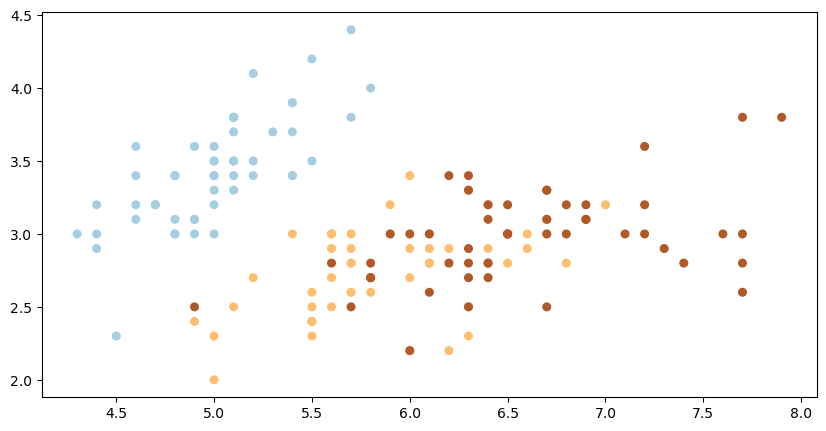

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encode=encoder.fit_transform(y)
plt.figure(figsize=(10,5))
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=encode, s=30, cmap=plt.cm.Paired)
plt.show()

In [23]:
from sklearn.datasets import make_classification
import pandas as pd
x, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
x = pd.DataFrame(x, columns=['Feature1', 'Feature2'])
y = pd.Series(y)

In [24]:
x

,Feature1,Feature2
0,1.228312,-0.757178
1,0.698409,-1.380295
2,2.548817,2.502258
3,0.573579,-1.352979
4,0.585900,-1.337457
...,...,...
95,0.473358,-1.438620
96,1.233323,1.239336
97,0.460109,-1.487396
98,0.679631,0.757837


In [25]:
y

0     0
1     0
2     1
3     0
4     0
     ..
95    0
96    1
97    0
98    1
99    1
Length: 100, dtype: int32

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
from sklearn.svm import SVC

In [29]:
model=SVC(kernel='rbf',random_state=42)

In [30]:
model.fit(x_train,y_train)

SVC(random_state=42)

In [31]:
y_pred=model.predict(x_test)

In [32]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0])

In [33]:
from sklearn.metrics import confusion_matrix,classification_report

In [34]:
print(confusion_matrix(y_test,y_pred))

[[13  0]
 [ 0  7]]


In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [36]:
import matplotlib.pyplot as plt

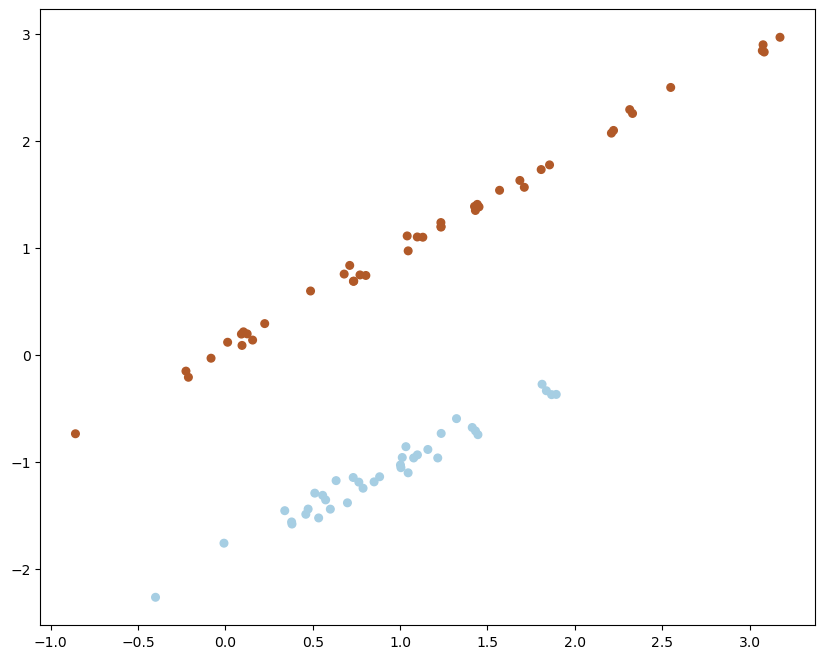

In [39]:
plt.figure(figsize=(10,8))
plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=encoder.fit_transform(y_train), s=30, cmap=plt.cm.Paired)
plt.show()

In [53]:
# Multi-class classification with SVM
import pandas as pd
df=pd.read_csv(r"C:\Users\91805\Downloads\Data science\iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [54]:
df['species'].replace({'setosa':'1','versicolor':'2','virginica':'3'})

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: species, Length: 150, dtype: object

In [56]:
from sklearn.model_selection import train_test_split

In [63]:
x=df[['sepal_length','sepal_width','petal_length','petal_width']]

In [64]:
y=df['species']

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [68]:
from sklearn.svm import SVC

In [69]:
model=SVC(kernel='rbf',gamma='scale')

In [70]:
model.fit(x_train,y_train)

SVC()

In [71]:
model.predict(x_test)

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [72]:
# SVM Regression
data = {
    'Years_Experience': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Salary': [45000, 50000, 60000, 65000, 70000, 80000, 85000, 90000, 95000, 100000]
}
df = pd.DataFrame(data)
df

,Years_Experience,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,65000
4,5,70000
5,6,80000
6,7,85000
7,8,90000
8,9,95000
9,10,100000


In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x=df[['Years_Experience']]
y=df['Salary']

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [76]:
from sklearn.svm import SVR

In [78]:
model=SVR(kernel='rbf')

In [79]:
model.fit(x_train,y_train)

SVR()

In [80]:
model.predict(x_test)

array([75002.45829579, 74997.54170421])

In [83]:
model.predict([[40]])

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([75000.])

In [84]:
# Binary Classification with SVM (Linear Kernel) + Decision Boundary

from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=42)


In [85]:
x,y

(array([[-2.98837186,  8.82862715],
        [ 5.72293008,  3.02697174],
        [-3.05358035,  9.12520872],
        [ 5.461939  ,  3.86996267],
        [ 4.86733877,  3.28031244],
        [-2.14780202, 10.55232269],
        [ 4.91656964,  2.80035293],
        [ 3.08921541,  2.04173266],
        [-2.90130578,  7.55077118],
        [-3.34841515,  8.70507375],
        [-2.44166942,  7.58953794],
        [ 3.40292813,  0.65271307],
        [-2.97867201,  9.55684617],
        [-3.83738367,  9.21114736],
        [ 3.95985411,  2.20542338],
        [ 3.85662554,  1.65110817],
        [ 4.70010905,  4.4364118 ],
        [ 3.56898634,  2.4556421 ],
        [ 4.69808755,  0.83019939],
        [-2.41743685,  7.02671721],
        [ 4.85397258,  0.72743091],
        [ 4.44751787,  2.27471703],
        [ 5.43091078,  1.06378223],
        [ 5.60325497,  2.38595061],
        [ 4.89976163,  2.75499256],
        [-0.92998481,  9.78172086],
        [ 4.56277713,  2.31432166],
        [-1.6966718 , 10.370

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [87]:
from sklearn.svm import SVC

In [88]:
model=SVC()

In [89]:
model.fit(x_train,y_train)

SVC()

In [94]:
y_pred=model.predict(x_test)

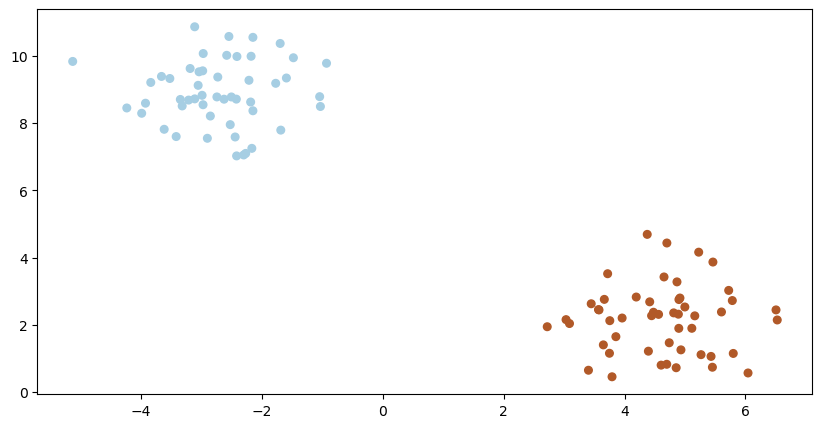

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(x[:,0],x[:,1],c=y,s=30,cmap=plt.cm.Paired)
plt.show()

In [93]:
from sklearn.metrics import confusion_matrix,classification_report

In [95]:
print(confusion_matrix(y_test,y_pred))

[[11  0]
 [ 0  9]]


In [96]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [97]:
model.score(x_test,y_test)

1.0

# 22-03-2025

In [9]:
#  SVM with Polynomial Kernel on Spiral Dataset + Plot Decision Surface

import pandas as pd
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=200, noise=0.2, random_state=42)
x

array([[-1.10689665e+00,  4.22928095e-02],
       [ 9.56799641e-01,  4.56750492e-01],
       [ 7.33516277e-01,  5.84617437e-01],
       [ 1.11140659e+00, -3.09213987e-01],
       [ 2.09081764e-01,  6.56679495e-04],
       [ 3.92205613e-01,  3.20238629e-01],
       [-7.56185073e-01,  8.29954942e-01],
       [ 1.50692319e+00, -1.11129319e-01],
       [ 2.04279588e+00, -3.79762883e-02],
       [ 1.44143707e-01,  9.16713583e-01],
       [-3.70182653e-01,  6.21450696e-01],
       [ 1.96525062e+00, -1.96615578e-01],
       [ 1.59638072e+00, -4.13640839e-01],
       [-8.63705975e-01,  4.41056511e-01],
       [ 1.84475945e+00,  2.10293824e-01],
       [ 1.97481657e+00, -3.74979774e-02],
       [ 6.79706368e-02,  1.48663499e+00],
       [ 1.01435177e+00, -5.38028119e-01],
       [-1.14599170e+00,  7.51822843e-01],
       [-2.94040701e-01,  6.59140623e-01],
       [ 3.99794131e-01,  5.33351479e-02],
       [ 9.19107031e-01,  6.55677023e-01],
       [ 9.87384687e-01, -7.42238318e-01],
       [-7.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
from sklearn.svm import SVC

In [13]:
model=SVC(kernel='poly',degree=3,decision_function_shape='ovr')

In [14]:
model.fit(x_train,y_train)

SVC(kernel='poly')

In [15]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [16]:
import matplotlib.pyplot as plt

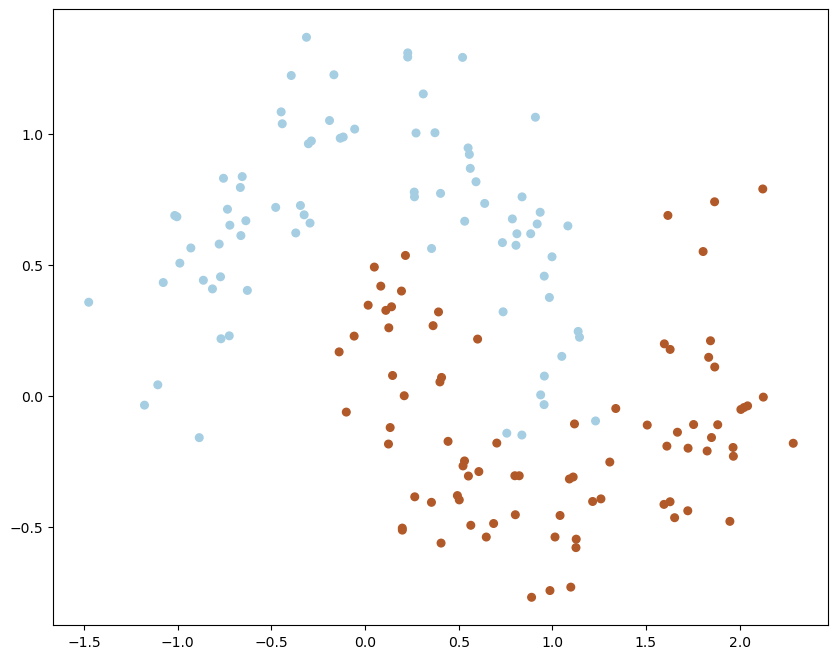

In [17]:
plt.figure(figsize=(10,8))
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,s=30,cmap=plt.cm.Paired)
plt.show()

In [18]:
from sklearn.metrics import confusion_matrix,classification_report

In [19]:
print(confusion_matrix(y_test,y_pred))

[[20  2]
 [ 1 17]]


In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        22
           1       0.89      0.94      0.92        18

    accuracy                           0.93        40
   macro avg       0.92      0.93      0.92        40
weighted avg       0.93      0.93      0.93        40



In [21]:
# SVM Hyperparameter Tuning + Heatmap Visualization

df=pd.read_csv(r"C:\Users\91805\Downloads\Data science\iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [22]:
from sklearn.model_selection import train_test_split

In [24]:
x=df[['sepal_length','sepal_width','petal_length','petal_width']]
y=df['species']

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
from sklearn.svm import SVC

In [27]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

In [28]:
model=SVC()

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
model_grid=GridSearchCV(model,param_grid, cv=5, return_train_score=True)

In [31]:
model_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf']},
             return_train_score=True)

In [32]:
y_pred=model_grid.predict(x_test)
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [33]:
from sklearn.metrics import confusion_matrix,classification_report

In [34]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [55]:
results = pd.DataFrame(model_grid.cv_results_)

In [58]:
pivot_table = results.pivot(index="param_C", columns="param_gamma", values="mean_test_score")
pivot_table

param_gamma,0.001,0.010,0.100,1.000
param_C,,,,
0.1,0.466667,0.466667,0.90,0.941667
1.0,0.466667,0.908333,0.95,0.958333
10.0,0.916667,0.950000,0.95,0.941667
100.0,0.950000,0.958333,0.95,0.933333


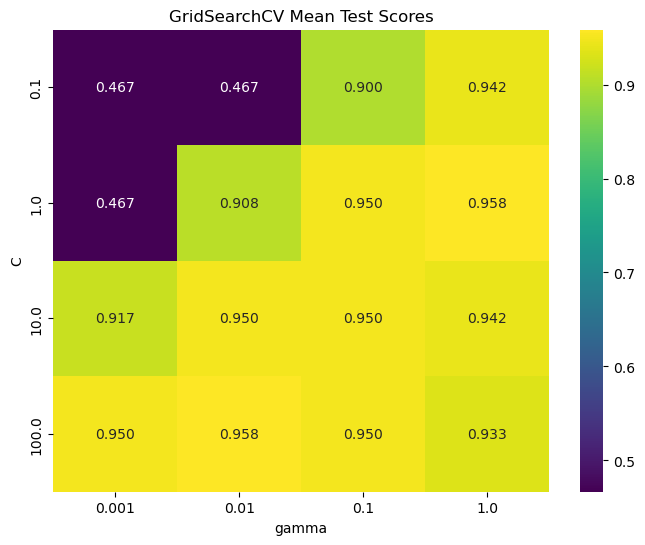

In [60]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="viridis")
plt.title("GridSearchCV Mean Test Scores")
plt.xlabel("gamma")
plt.ylabel("C")
plt.show()

In [62]:
print("Best Parameters:", model_grid.best_params_)
print("Best CV Score:", model_grid.best_score_)

Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best CV Score: 0.9583333333333334


In [36]:
# SVM Regression (SVR) + Regression Line Plot

import pandas as pd
data = {
    'Years_Experience': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Salary': [45000, 50000, 60000, 65000, 70000, 80000, 85000, 90000, 95000, 100000]
}
df = pd.DataFrame(data)
df

,Years_Experience,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,65000
4,5,70000
5,6,80000
6,7,85000
7,8,90000
8,9,95000
9,10,100000


In [37]:
x=df[['Years_Experience']]
y=df['Salary']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [41]:
from sklearn.svm import SVR

In [42]:
model_svr=SVR(kernel='rbf')

In [43]:
model_svr.fit(x_train,y_train)

SVR()

In [44]:
model_svr.predict(x_test)

array([75002.45829579, 74997.54170421])

## Association Rules

In [63]:
# Market Basket Analysis with Apriori

import pandas as pd
data = [['milk', 'bread', 'butter'],
        ['beer', 'bread'],
        ['milk', 'bread', 'butter', 'beer'],
        ['bread', 'butter']]

df = pd.DataFrame({'Transaction': data})
df

,Transaction
0,"[milk, bread, butter]"
1,"[beer, bread]"
2,"[milk, bread, butter, beer]"
3,"[bread, butter]"


In [81]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [82]:
te=TransactionEncoder()
te

TransactionEncoder()

In [83]:
te_ary=te.fit(data).transform(data)
te_ary

array([[False,  True,  True,  True],
       [ True,  True, False, False],
       [ True,  True,  True,  True],
       [False,  True,  True, False]])

In [84]:
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded

,beer,bread,butter,milk
0,False,True,True,True
1,True,True,False,False
2,True,True,True,True
3,False,True,True,False


In [85]:
frequent_itemset=apriori(df_encoded,min_support=0.5,use_colnames=True)
frequent_itemset

,support,itemsets
0,0.50,(beer)
1,1.00,(bread)
2,0.75,(butter)
3,0.50,(milk)
4,0.50,"(bread, beer)"
5,0.75,"(bread, butter)"
6,0.50,"(bread, milk)"
7,0.50,"(milk, butter)"
8,0.50,"(bread, milk, butter)"


In [90]:
rules = association_rules(frequent_itemset, metric="lift", min_threshold=1,num_itemsets= int)
rules

C:\Users\91805\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(bread),(beer),1.00,0.50,0.50,0.500000,1.000000,1.0,0.000,1.0,0.0,0.500000,0.000000,0.750000
1,(beer),(bread),0.50,1.00,0.50,1.000000,1.000000,1.0,0.000,inf,0.0,0.500000,0.000000,0.750000
2,(bread),(butter),1.00,0.75,0.75,0.750000,1.000000,1.0,0.000,1.0,0.0,0.750000,0.000000,0.875000
3,(butter),(bread),0.75,1.00,0.75,1.000000,1.000000,1.0,0.000,inf,0.0,0.750000,0.000000,0.875000
4,(bread),(milk),1.00,0.50,0.50,0.500000,1.000000,1.0,0.000,1.0,0.0,0.500000,0.000000,0.750000
5,(milk),(bread),0.50,1.00,0.50,1.000000,1.000000,1.0,0.000,inf,0.0,0.500000,0.000000,0.750000
6,(milk),(butter),0.50,0.75,0.50,1.000000,1.333333,1.0,0.125,inf,0.5,0.666667,1.000000,0.833333
7,(butter),(milk),0.75,0.50,0.50,0.666667,1.333333,1.0,0.125,1.5,1.0,0.666667,0.333333,0.833333
8,"(bread, milk)",(butter),0.50,0.75,0.50,1.000000,1.333333,1.0,0.125,inf,0.5,0.666667,1.000000,0.833333
9,"(bread, butter)",(milk),0.75,0.50,0.50,0.666667,1.333333,1.0,0.125,1.5,1.0,0.666667,0.333333,0.833333


In [ ]:
# FP-Growth on Online Retail Dataset